### Set Up

#### Standard library imports

In [1]:
import datetime
import os
import sys

#### Third party imports 

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file

#### Local imports

In [3]:
from modules.magenta.rl_tuner import rl_tuner
from modules.magenta.rl_tuner import rl_tuner_ops

#### Autoreload

In [4]:
%load_ext autoreload
%autoreload 2

#### Setting relative directories and file names

In [5]:
# Place to save your model checkpoints and composion
Working_Directory = os.getcwd()
Project_Directory = os.path.abspath(os.path.join(Working_Directory,'..'))
Output_Directory = Project_Directory + "/outputs/"
Model_Directory = Output_Directory + "models/"
Music_Out_Directory = Output_Directory + "midi/"
Checkpoint_Directory = Model_Directory + "ckpt/"

In [6]:
current_time_str = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
try:
    os.mkdir(Checkpoint_Directory + current_time_str[:-7])    
except:
    pass
DRL_ckpt_dir_name = "20211016" + "/rl_tuner/"
DRL_ckpt_name = "Long_Train_plus_chopin"
DRL_ckpt_dir = Checkpoint_Directory + DRL_ckpt_dir_name
DRL_ckpt_file = DRL_ckpt_dir + DRL_ckpt_name

DL_ckpt_dir_name = "20211006/"
DL_ckpt_name = "Long_Train_256_plus_chopin"
DL_ckpt_dir = Checkpoint_Directory + DL_ckpt_dir_name
DL_ckpt_file = DL_ckpt_dir + DL_ckpt_name

#### Compare ckpt -files

In [7]:
print_tensors_in_checkpoint_file(file_name = DRL_ckpt_file, tensor_name='', all_tensors=False)

Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/models/ckpt/20211016/rl_tuner/Long_Train_plus_chopin


In [8]:
print_tensors_in_checkpoint_file(file_name = DL_ckpt_file, tensor_name='', all_tensors=False)

dense/bias (DT_FLOAT) [3]
dense/bias/Adadelta (DT_FLOAT) [3]
dense/bias/Adadelta_1 (DT_FLOAT) [3]
dense/kernel (DT_FLOAT) [64,3]
dense/kernel/Adadelta (DT_FLOAT) [64,3]
dense/kernel/Adadelta_1 (DT_FLOAT) [64,3]
dense_1/bias (DT_FLOAT) [3]
dense_1/bias/Adadelta (DT_FLOAT) [3]
dense_1/bias/Adadelta_1 (DT_FLOAT) [3]
dense_1/kernel (DT_FLOAT) [67,3]
dense_1/kernel/Adadelta (DT_FLOAT) [67,3]
dense_1/kernel/Adadelta_1 (DT_FLOAT) [67,3]
dense_10/bias (DT_FLOAT) [3]
dense_10/bias/Adadelta (DT_FLOAT) [3]
dense_10/bias/Adadelta_1 (DT_FLOAT) [3]
dense_10/kernel (DT_FLOAT) [67,3]
dense_10/kernel/Adadelta (DT_FLOAT) [67,3]
dense_10/kernel/Adadelta_1 (DT_FLOAT) [67,3]
dense_11/bias (DT_FLOAT) [3]
dense_11/bias/Adadelta (DT_FLOAT) [3]
dense_11/bias/Adadelta_1 (DT_FLOAT) [3]
dense_11/kernel (DT_FLOAT) [67,3]
dense_11/kernel/Adadelta (DT_FLOAT) [67,3]
dense_11/kernel/Adadelta_1 (DT_FLOAT) [67,3]
dense_12/bias (DT_FLOAT) [3]
dense_12/bias/Adadelta (DT_FLOAT) [3]
dense_12/bias/Adadelta_1 (DT_FLOAT) [3]
d

### Initialise network

In [9]:
# Model parameter settings
ALGORITHM = 'q'
REWARD_SCALER = 1
OUTPUT_EVERY_NTH = int(5e4)
NUM_NOTES_IN_COMPOSITION = 32
PRIME_WITH_MIDI = False

In [10]:
rl_tuner_hparams = tf.contrib.training.HParams(random_action_probability = 0.1,
                                               store_every_nth = 1,
                                               train_every_nth = 5,
                                               minibatch_size = 32,
                                               discount_rate = 0.5,
                                               max_experience = 10000,
                                               target_network_update_rate = 0.0001)

In [11]:
rl_net = rl_tuner.RLTuner(DRL_ckpt_dir,
                          Music_Out_Directory,
                          note_rnn_checkpoint_dir = DL_ckpt_dir,
                          note_rnn_checkpoint_file = DL_ckpt_file,
                          dqn_hparams = rl_tuner_hparams, 
                          algorithm = ALGORITHM,
                          reward_scaler = REWARD_SCALER,
                          output_every_nth = OUTPUT_EVERY_NTH,
                          num_notes_in_melody = NUM_NOTES_IN_COMPOSITION)

INFO:tensorflow:Initializing q network
INFO:tensorflow:Initializing melody RNN graph for scope q_network
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
INFO:tensorflow:Initializing reward network
INFO:tensorflow:Initializing melody RNN graph for scope reward_rnn
INFO:tensorflow:Adding RL graph variables
INFO:tensorflow:Adding reward computation portion of the graph
INFO:tensorflow:Adding taking action portion of graph
Instructions for updating:
Use the `axis` argument instead
INFO:tensorflow:Add estimating future rewards portion of graph
INFO:tensorflow:Adding q value prediction portion of graph
INFO:tensorflow:Adding target network update portion of graph
INFO:tensorflow:Restoring variables from checkpoint
INFO:tensorflow:Checkpoint dir: /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/models/ckpt/20211006/
INFO:tensorflow:Checkpoint file: /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/mo

### Generate initial music sequence before training with RL 

INFO:tensorflow:Priming with note 0
INFO:tensorflow:Generated sequence: [0, 9, 9, 9, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
INFO:tensorflow:Wrote a melody to /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/midi/
INFO:tensorflow:Visualizing note selection probabilities:


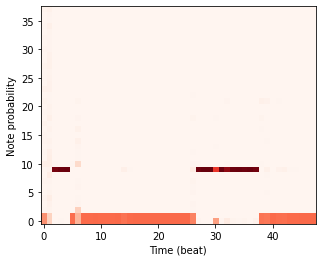

In [12]:
rl_net.generate_music_sequence(visualize_probs=True, title='pre_rl', length=48)

### DRL training

In [13]:
n = int(1e6)
rl_net.train(num_steps=n, exploration_period=n // 2)

INFO:tensorflow:Evaluating model at 20211016-181335...


/home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/notebooks/modules/magenta/rl_tuner/rl_tuner_ops.py:141: RuntimeWarning: invalid value encountered in double_scalars
  return (x[lag:] * x[:n - lag]).sum() / float(n) / c0


INFO:tensorflow:Finished model evaluation at 20211016-181423!
INFO:tensorflow:Evaluating model at 20211016-191237...
INFO:tensorflow:Training iteration 50000
INFO:tensorflow:	Reward for last 50000 steps: -462924.13795591204
INFO:tensorflow:		Music theory reward: -28785.61125301711
INFO:tensorflow:		Note RNN reward: -434138.52670291066
INFO:tensorflow:	Exploration probability is 0.91
INFO:tensorflow:Finished model evaluation at 20211016-191333!
INFO:tensorflow:Evaluating model at 20211016-200604...
INFO:tensorflow:Training iteration 100000
INFO:tensorflow:	Reward for last 50000 steps: -467783.0796831892
INFO:tensorflow:		Music theory reward: -42162.03110989132
INFO:tensorflow:		Note RNN reward: -425621.04857331514
INFO:tensorflow:	Exploration probability is 0.8200000000000001
INFO:tensorflow:Finished model evaluation at 20211016-200655!
INFO:tensorflow:Evaluating model at 20211016-205827...
INFO:tensorflow:Training iteration 150000
INFO:tensorflow:	Reward for last 50000 steps: -463443.8

### Analyse Results

In [14]:
grad = tf.constant([-0.1,1.,0.,0.])
epsilon = tf.constant(0.001)
grad_pos_eps = tf.cast(tf.greater_equal(grad, 0), dtype=grad.dtype) * epsilon
grat_neg_eps = tf.cast(tf.less(grad, 0), dtype=grad.dtype) * (-epsilon)
grad = grad + grad_pos_eps + grat_neg_eps

with tf.Session() as sess:  print(grad.eval()) 

[-1.010e-01  1.001e+00  1.000e-03  1.000e-03]


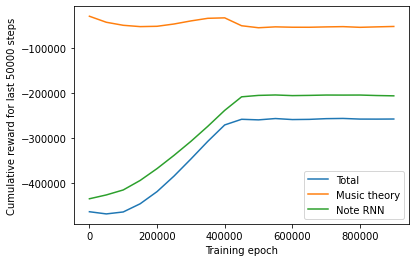

In [15]:
# Plot the rewards received during training. Improves as chance of random exploration action decreases.
rl_net.plot_rewards()

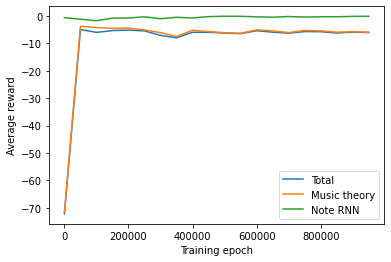

In [16]:
# Plot rewards received during calls to evaluation function throughout training. 
# Does not include exploration or random actions.
rl_net.plot_evaluation()

### Generate sequence after training with RL 

INFO:tensorflow:Priming with note 24
INFO:tensorflow:Generated sequence: [36, 35, 36, 36, 35, 36, 36, 35, 36, 36, 35, 36, 36, 35, 36, 36, 35, 36, 36, 35, 36, 36, 35, 36, 36, 35, 36, 36, 35, 36, 35, 35, 36, 36, 35, 36, 36, 35, 36, 36, 35, 36, 36, 35, 36, 36, 35, 36]
INFO:tensorflow:Wrote a melody to /home/mirko/Documents/FHWN/MA/master_thesis/code/tf1/outputs/midi/
INFO:tensorflow:Visualizing note selection probabilities:


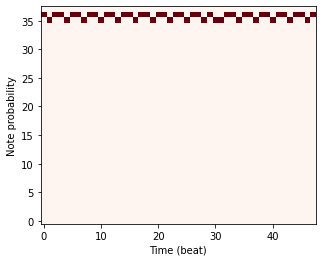

In [24]:
rl_net.generate_music_sequence(visualize_probs=True, title='post_rl', length=48)

### Save Model

In [25]:
# If you're happy with the model, save a version!
rl_net.save_model('model_full_no_chopin', DRL_ckpt_dir)

### Compute music theory statistics

In [26]:
# Compute statistics about how well the model adheres to the music theory rules.
stat_dict = rl_net.evaluate_music_theory_metrics(num_compositions=100)

INFO:tensorflow:Total compositions: 100.0
Total notes:3200.0
	Compositions starting with tonic: 0.0
	Compositions with unique highest note:0.0
	Compositions with unique lowest note:0.0
	Number of resolved leaps:0.0
	Number of double leaps:0.0
	Notes not in key:2182.0
	Notes in motif:0.0
	Notes in repeated motif:0.0
	Notes excessively repeated:1.0

	Percent compositions starting with tonic:0.0
	Percent compositions with unique highest note:0.0
	Percent compositions with unique lowest note:0.0
	Percent of leaps resolved:nan
	Percent notes not in key:0.681875
	Percent notes in motif:0.0
	Percent notes in repeated motif:0.0
	Percent notes excessively repeated:0.0003125

	Average autocorrelation of lag1:-0.44488024656502917
	Average autocorrelation of lag2:-0.4192757387539997
	Average autocorrelation of lag3:0.7841389202584854

	Avg. num octave jumps per composition:0.0
	Avg. num sevenths per composition:0.0
	Avg. num fifths per composition:0.0
	Avg. num sixths per composition:0.0
	Avg. num

### Restore from directory

In [ ]:
rl_tuner_hparams = tf.contrib.training.HParams(random_action_probability = 0.1,
                                               store_every_nth = 1,
                                               train_every_nth = 5,
                                               minibatch_size = 32,
                                               discount_rate = 0.5,
                                               max_experience = 10000,
                                               target_network_update_rate = 0.01)

In [ ]:
x      = rl_tuner.RLTuner(DRL_ckpt_dir,
                          Music_Out_Directory,
                          note_rnn_checkpoint_dir = DL_ckpt_dir,
                          note_rnn_checkpoint_file = DL_ckpt_file,
                          dqn_hparams = rl_tuner_hparams, 
                          algorithm = ALGORITHM,
                          reward_scaler = REWARD_SCALER,
                          output_every_nth = OUTPUT_EVERY_NTH,
                          num_notes_in_melody = NUM_NOTES_IN_COMPOSITION)

In [ ]:
x.restore_from_directory(Checkpoint_Directory+DRL_ckpt_dir_name,'model_full_no_chopin-995000', reward_file_name =  )